In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

In [23]:
df_producao = pd.read_csv('data/producao_soja_campo_novo_parecis.csv', delimiter = ';')
df_producao

cidade  area_plantada  area_colhida  qtd_produzida  data
0   Campo Novo do Parecis         291070        291070         818489  2000
1   Campo Novo do Parecis         283000        283000         849000  2001
2   Campo Novo do Parecis         300000        300000         900000  2002
3   Campo Novo do Parecis         320186        320186         902924  2003
4   Campo Novo do Parecis         325882        325882         879881  2004
5   Campo Novo do Parecis         343301        343301        1071099  2005
6   Campo Novo do Parecis         350000        344750         868770  2006
7   Campo Novo do Parecis         298000        298000         894000  2007
8   Campo Novo do Parecis         311500        311500         990570  2008
9   Campo Novo do Parecis         311500        311500         967208  2009
10  Campo Novo do Parecis         329214        329214        1006135  2010
11  Campo Novo do Parecis         315350        315350         990352  2011
12  Campo Novo do Parecis         336000        336000        1063800  2012
13  Campo Novo do Parecis         384000        384000        1125720  2013
14  Campo Novo do Parecis         388000        387400        1194288  2014
15  Campo Novo do Parecis         380500        380500        1197900  2015
16  Campo Novo do Parecis         380000        380000        1162800  2016
17  Campo Novo do Parecis         380000        368600        1172148  2017
18  Campo Novo do Parecis         380000        380000        1322400  2018
19  Campo Novo do Parecis         380000        380000        1276800  2019

In [24]:
df_clima = pd.read_csv('data/clima_campo_novo_parecis_noheader.csv', delimiter = ';')

In [25]:
data = df_clima['data']
ano = [a.split('/')[-1] for a in data]
df_clima['data'] = ano

In [26]:
df_clima['data']=df_clima['data'].astype(int)
df_producao['data']=df_producao['data'].astype(int)

df_outer = pd.merge(df_clima, df_producao, on = 'data')
df_outer

data PRECIPITACAO TOTAL, DIARIO (AUT)(mm)  \
0     2002                                  NaN   
1     2002                                  NaN   
2     2002                                  NaN   
3     2002                                  NaN   
4     2002                                  NaN   
...    ...                                  ...   
6224  2019                                  NaN   
6225  2019                                  NaN   
6226  2019                                  NaN   
6227  2019                                  NaN   
6228  2019                                  NaN   

     PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                                           NaN   
...                                         ...   
6224                                 950,816667   
6225                                 950,745833   
6226                                 950,229167   
6227                                 949,245833   
6228                                 949,704167   

     TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C)  \
0                                                  23,7       
1                                                21,275       
2                                             21,583333       
3                                             20,979167       
4                                             20,683333       
...                                                 ...       
6224                                                NaN       
6225                                                NaN       
6226                                                NaN       
6227                                                NaN       
6228                                                NaN       

     TEMPERATURA MAXIMA, DIARIA (AUT)(°C) TEMPERATURA MEDIA, DIARIA (AUT)(°C)  \
0                                    28,3                                26,2   
1                                    26,3                           24,108333   
2                                    29,4                              24,575   
3                                    29,5                           23,379167   
4                                    28,7                           23,433333   
...                                   ...                                 ...   
6224                                 32,6                                25,8   
6225                                 30,7                           24,216667   
6226                                   31                           24,816667   
6227                                 31,3                           24,758333   
6228                                 28,8                           23,966667   

     TEMPERATURA MINIMA, DIARIA (AUT)(°C)  \
0                                    25,1   
1                                     NaN   
2                                    21,3   
3                                    21,4   
4                                    20,4   
...                                   ...   
6224                                 22,5   
6225                                   21   
6226                                 21,7   
6227                                 21,6   
6228                                 20,5   

     UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)  \
0                                               86   
1                                        84,416667   
2                                        84,041667   
3                                        87,166667   
4                                        85,458333   
...                                            ...   
6224                                           NaN   
6225                                           NaN   
6226                   

In [27]:
df_outer = df_outer.drop(columns=['cidade'], axis = 0)
df_outer.columns = [
    'data',
    'prec_total_diario',
    'pressao_atm_med_dia',
    'temp_ponto_orvalho_med',
    'temp_max_dia',
    'temp_med_dia',
    'temp_min_dia',
    'umi_rel_ar_med',
    'umi_rel_ar_min',
    'vento_raj_max_dia',
    'vento_vel_med_dia',
    'area_plantada',
    'area_colhida',
    'qtd_produzida'
]

In [28]:
df_outer.isna().sum()

data                         0
prec_total_diario         1693
pressao_atm_med_dia       1450
temp_ponto_orvalho_med    1614
temp_max_dia              1131
temp_med_dia              1503
temp_min_dia              1136
umi_rel_ar_med            1459
umi_rel_ar_min            1394
vento_raj_max_dia         1167
vento_vel_med_dia         1450
area_plantada                0
area_colhida                 0
qtd_produzida                0
dtype: int64

In [29]:
df_outer.dtypes

data                        int32
prec_total_diario          object
pressao_atm_med_dia        object
temp_ponto_orvalho_med     object
temp_max_dia               object
temp_med_dia               object
temp_min_dia               object
umi_rel_ar_med             object
umi_rel_ar_min            float64
vento_raj_max_dia          object
vento_vel_med_dia          object
area_plantada               int64
area_colhida                int64
qtd_produzida               int64
dtype: object

In [30]:
df = df_outer.dropna()
df = df.astype(str).stack().str.replace(',','.').unstack().astype(float)
df.tail()

data  prec_total_diario  pressao_atm_med_dia  temp_ponto_orvalho_med  \
5950  2019.0               10.4           952.745833               22.754167   
5951  2019.0                3.0           953.150000               22.504167   
5952  2019.0                1.8           953.454167               22.433333   
5953  2019.0                1.4           952.016667               22.966667   
5954  2019.0                0.6           951.354167               22.320833   

      temp_max_dia  temp_med_dia  temp_min_dia  umi_rel_ar_med  \
5950          28.0     23.495833          22.3       95.833333   
5951          31.2     24.895833          21.1       87.916667   
5952          30.8     24.612500          21.2       88.875000   
5953          31.5     25.708333          21.9       85.916667   
5954          31.7     25.512500          21.6       83.833333   

      umi_rel_ar_min  vento_raj_max_dia  vento_vel_med_dia  area_plantada  \
5950            82.0                6.5           1.450000       380000.0   
5951            62.0                9.1           1.333333       380000.0   
5952            63.0                6.9           1.587500       380000.0   
5953            60.0                7.2           1.162500       380000.0   
5954            55.0                8.5           0.945833       380000.0   

      area_colhida  qtd_produzida  
5950      380000.0      1276800.0  
5951      380000.0      1276800.0  
5952      380000.0      1276800.0  
5953      380000.0      1276800.0  
5954      380000.0      1276800.0

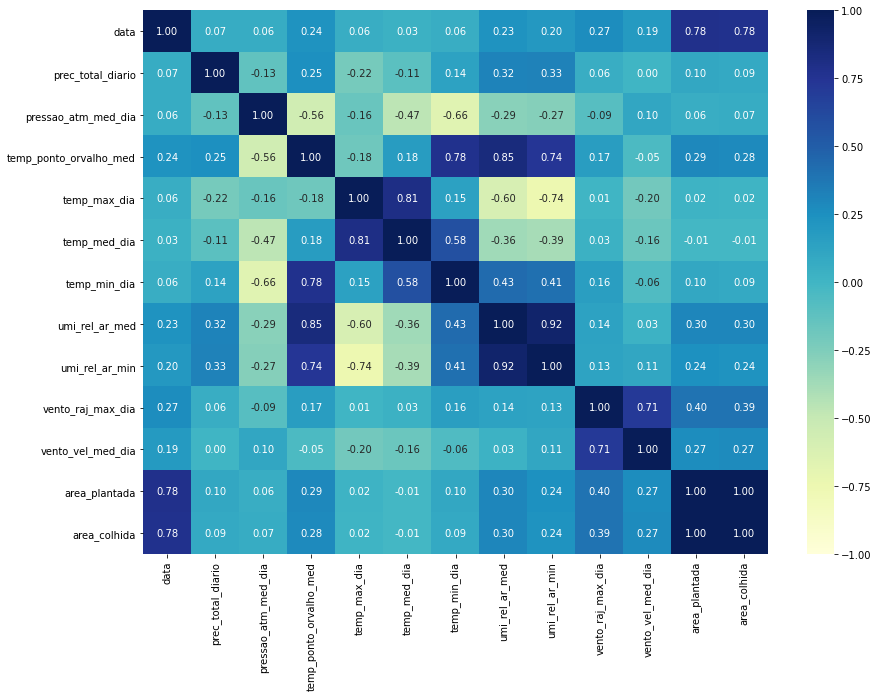

In [10]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.drop('qtd_produzida', axis=1).corr(), cmap='YlGnBu', annot=True, fmt='.2f', vmin=-1);

In [11]:
X = df.iloc[:, 0:13].values
y = df.iloc[:, 13].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [13]:
model_v1 = linear_model.LinearRegression()

In [15]:
model_v1.fit(X_train, y_train)

LinearRegression()

In [16]:
predict_v1 = model_v1.predict(X_test)

In [17]:
mean_squared_error(y_test, predict_v1)

1405161355.8990204

In [18]:
mean_absolute_error(y_test, predict_v1)

29052.279004791108

In [19]:
r2_score(y_test, predict_v1)

0.9281610151242784

In [20]:
cv_4_results = cross_val_score(model_v1, X, y, cv=4, scoring="neg_mean_squared_error")

In [21]:
cv_4_results

array([-5.97098861e+09, -8.26156180e+08, -8.39769447e+08, -9.60179711e+09])